Objective is t predict the Stroke for the new Clients

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [194]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = pd.DataFrame(data)
df      

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [195]:
df.shape

(5110, 12)

In [196]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [197]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Statistics of Categorical Variables.

In [199]:
df.describe(exclude=['int','float'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Data Wrangling 

In [200]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

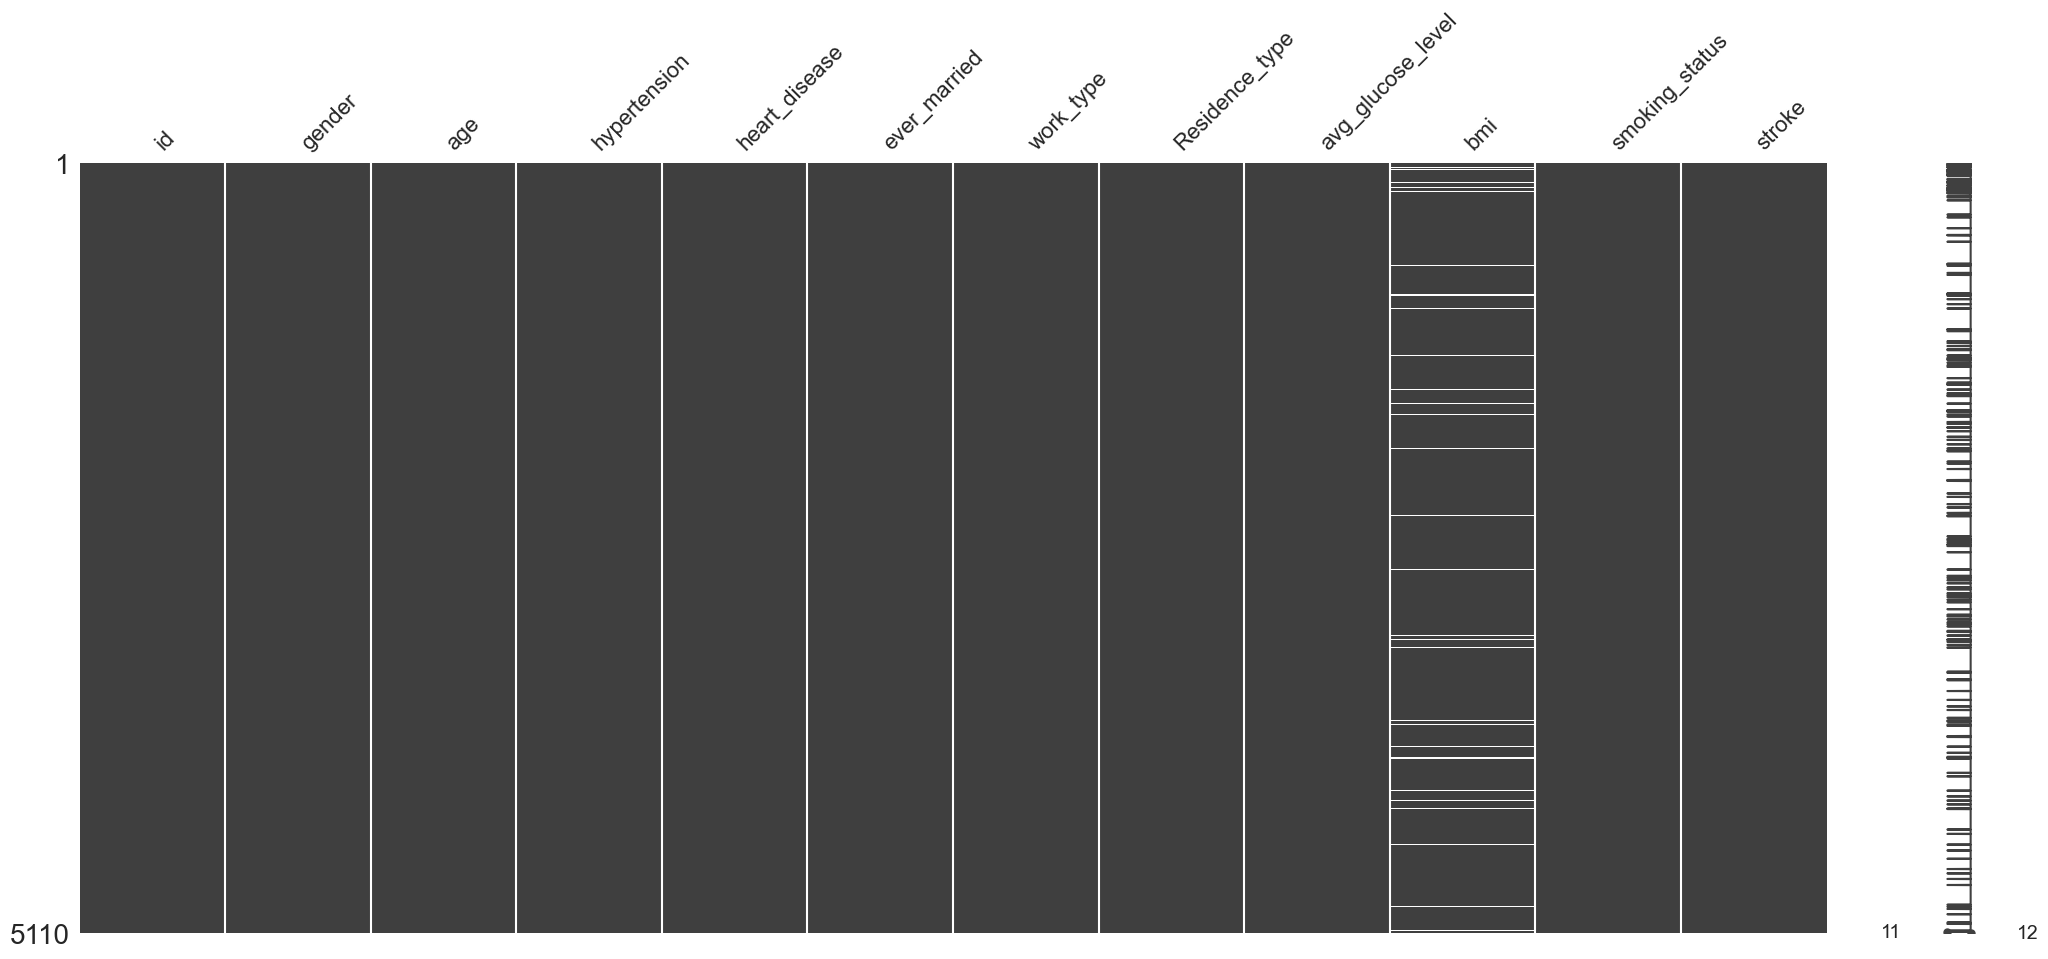

In [201]:
msno.matrix(df)

<Axes: >

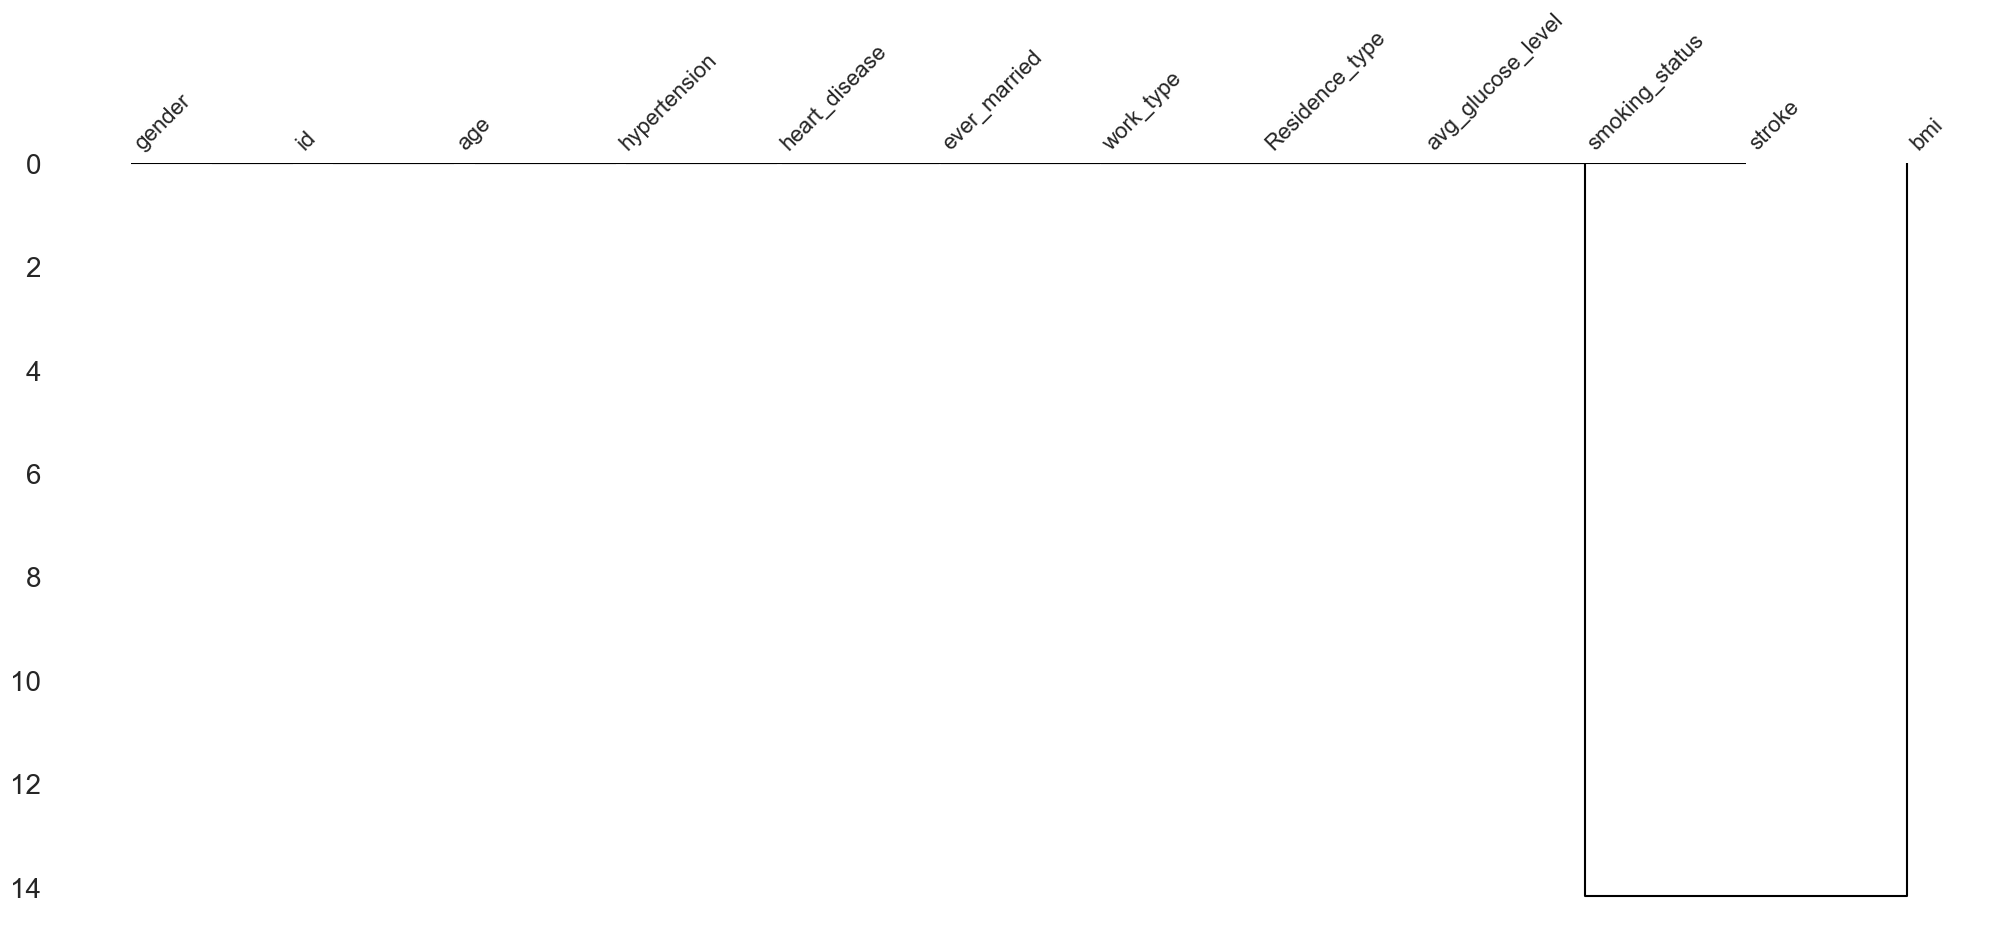

In [202]:
msno.dendrogram(df)

In [203]:
df.duplicated().sum()

0

In [204]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [205]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Unique Values 

In [206]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f'Unique values  in the "{col}" : {unique_values}')

Unique values  in the "id" : [ 9046 51676 31112 ... 19723 37544 44679]
Unique values  in the "gender" : ['Male' 'Female' 'Other']
Unique values  in the "age" : [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 

Number of Unique values 

In [207]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f'Unique values  in the "{col}" : {unique_values}')

Unique values  in the "id" : 5110
Unique values  in the "gender" : 3
Unique values  in the "age" : 104
Unique values  in the "hypertension" : 2
Unique values  in the "heart_disease" : 2
Unique values  in the "ever_married" : 2
Unique values  in the "work_type" : 5
Unique values  in the "Residence_type" : 2
Unique values  in the "avg_glucose_level" : 3979
Unique values  in the "bmi" : 419
Unique values  in the "smoking_status" : 4
Unique values  in the "stroke" : 2


In [208]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [209]:
df[df['gender'] == 'Other'].count()

id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

In [210]:
df['gender'] = df['gender'].replace('Other','Male')

In [211]:
df['gender'].value_counts()

gender
Female    2994
Male      2116
Name: count, dtype: int64

In [212]:
unique_values = df['gender'].unique()
print(f'Unique values  in the gender : {unique_values}')

Unique values  in the gender : ['Male' 'Female']


In [213]:
from scipy.stats import f_oneway, kruskal

# Example with ANOVA
grouped_data = [df['age'][df['work_type'] == work_type] for work_type in df['work_type'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

# Example with Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)
stat
p_value


0.0

Correlation

In [214]:
correlation = df.select_dtypes('number').corr()
correlation

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: >

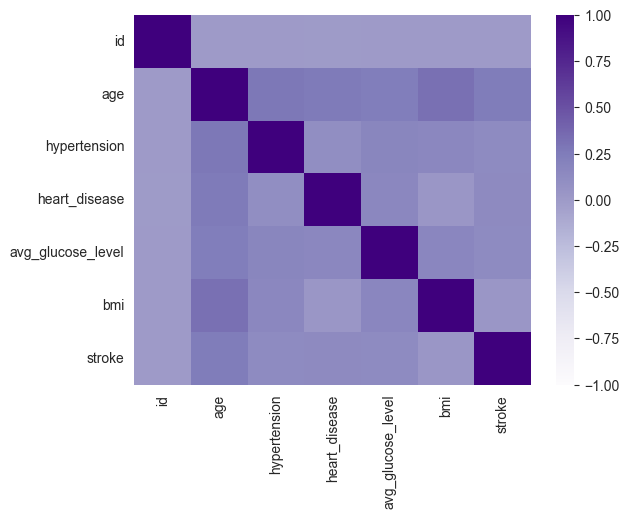

In [215]:
sns.heatmap(correlation, vmin= -1, vmax= 1, cmap='Purples')

Outliers

In [216]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float':
        fig = go.Figure(go.Box(x=df[col], orientation='h'))
        fig.update_layout(title=f"Box Plot for {col}",xaxis_title="Values")
        fig.show()

In [217]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [218]:
(df['avg_glucose_level'] > 120).value_counts()

avg_glucose_level
False    3991
True     1119
Name: count, dtype: int64

In [219]:
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [220]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [221]:
(df['bmi'] > 25).value_counts()

bmi
True     3503
False    1607
Name: count, dtype: int64

In [222]:
((df['avg_glucose_level'] > 120) & (df['bmi'] > 25)).sum()

876

In [223]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Feature Engineering

In [224]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [225]:
print(f'Maximum age variable: {df["age"].max()}')
print(f'Minimum age variable: {df["age"].min()}')
print(f'Number of age variables: {df["age"].nunique()}')

Maximum age variable: 82.0
Minimum age variable: 0.08
Number of age variables: 104


In [226]:
ranges =  [0,13,18,45,60,100]
grp_names = ['childers', 'teens', 'Adults', 'mid-Adults', 'Elders']
df['age_grp'] = pd.cut(df['age'], bins= ranges, labels= grp_names)
df['age_grp'].unique() 

['Elders', 'mid-Adults', 'Adults', 'childers', 'teens']
Categories (5, object): ['childers' < 'teens' < 'Adults' < 'mid-Adults' < 'Elders']

In [227]:
print(f'Maximum bmi variable: {df["bmi"].max()}')
print(f'Minimum bmi variable: {df["bmi"].min()}')
print(f'Number of bmi variables: {df["bmi"].nunique()}')

Maximum bmi variable: 97.6
Minimum bmi variable: 10.3
Number of bmi variables: 419


In [228]:
ranges =[0,19,25,30,40]
grp_names = ['underweight', 'normal', 'overweight', 'Obesity']
df['bmi_grp'] = pd.cut(df['bmi'], bins= ranges, labels= grp_names)
df['bmi_grp'].unique()

['Obesity', 'overweight', 'normal', NaN, 'underweight']
Categories (4, object): ['underweight' < 'normal' < 'overweight' < 'Obesity']

In [229]:
print(f'Maximum avg_glucose_level variable: {df["avg_glucose_level"].max()}')
print(f'Minimum avg_glucose_level variable: {df["avg_glucose_level"].min()}')
print(f'Number of avg_glucose_level variables: {df["avg_glucose_level"].nunique()}')

Maximum avg_glucose_level variable: 271.74
Minimum avg_glucose_level variable: 55.12
Number of avg_glucose_level variables: 3979


In [230]:
ranges = [0,70,100,125,200]
grp_names = ['Low', 'normal', 'high', 'very_high']
df['avg_glucose_level_grp'] = pd.cut(df['avg_glucose_level'], bins= ranges, labels=grp_names)
df['avg_glucose_level_grp'].unique()

[NaN, 'high', 'very_high', 'normal', 'Low']
Categories (4, object): ['Low' < 'normal' < 'high' < 'very_high']

In [231]:
df['stroke'].value_counts() # Not Balanced shuld be done of oversampling

stroke
0    4861
1     249
Name: count, dtype: int64

Visualization between the featurs with Stroke Feature

In [232]:
st = df[df['stroke'] == 1]
st

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_grp,bmi_grp,avg_glucose_level_grp
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elders,Obesity,NaN
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elders,overweight,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elders,Obesity,high
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,mid-Adults,Obesity,very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elders,normal,very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1,mid-Adults,Obesity,normal
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.900000,Unknown,1,teens,Obesity,Low
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.300000,formerly smoked,1,Elders,overweight,normal
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,28.893237,Unknown,1,Elders,overweight,normal


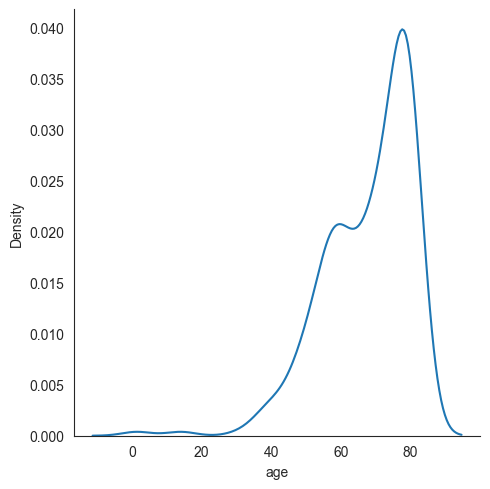

In [233]:
stroke = df[df['stroke']==1]
sns.displot(stroke['age'], kind='kde')
sns.set_style('darkgrid')
plt.show()

In [234]:
fig = px.histogram(stroke, x='age', color='stroke', marginal='box', nbins=20, title='Distribution of Age with Stroke')
fig.show()

In [235]:
fig = px.histogram(stroke, x='bmi', color='stroke', marginal='box', nbins=20, title='Distribution of bmi with Stroke')
fig.show()

In [236]:
fig = px.histogram(stroke, x='avg_glucose_level', color='stroke', marginal='box', nbins=20, title='Distribution of avg_glucose_level with Stroke')
fig.show()

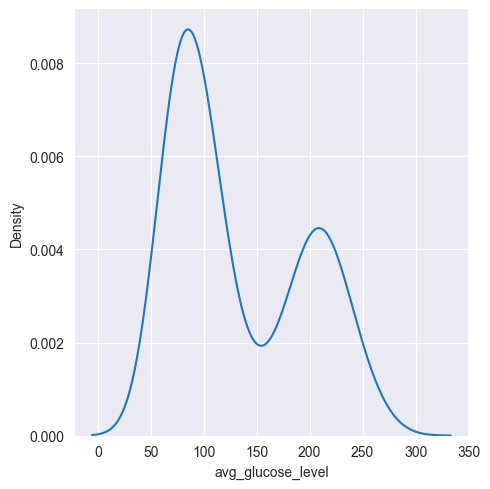

In [237]:
stroke = df[df['stroke']==1]
sns.displot(stroke['avg_glucose_level'], kind='kde')
sns.set_style('darkgrid')
plt.show()


In [238]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_grp,bmi_grp,avg_glucose_level_grp
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elders,Obesity,NaN
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elders,overweight,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elders,Obesity,high
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,mid-Adults,Obesity,very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elders,normal,very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Elders,overweight,normal
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Elders,Obesity,very_high
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Adults,Obesity,normal
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,mid-Adults,overweight,very_high


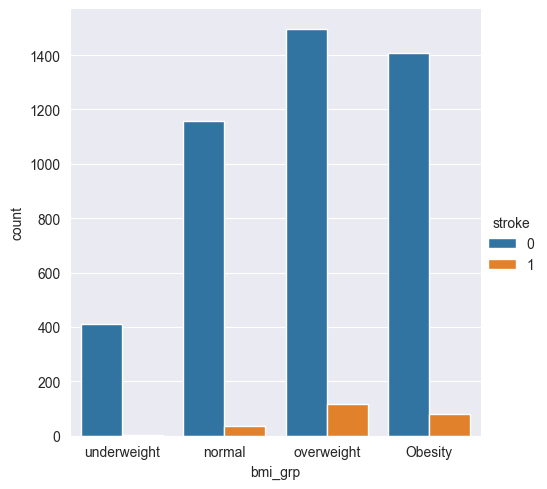

In [239]:
sns.catplot(data=df, x='bmi_grp', kind='count', hue='stroke')
sns.set_style('white')
plt.show()

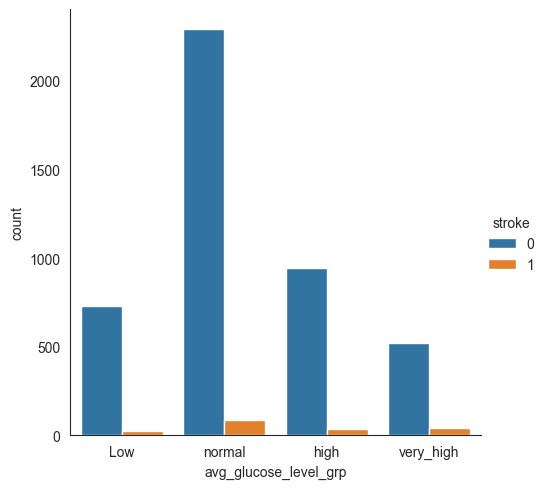

In [240]:
sns.catplot(data=df, x='avg_glucose_level_grp', kind='count', hue='stroke')
sns.set_style('white')
plt.show()

In [241]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_grp,bmi_grp,avg_glucose_level_grp
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Elders,Obesity,NaN
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Elders,overweight,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Elders,Obesity,high
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,mid-Adults,Obesity,very_high
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Elders,normal,very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Elders,overweight,normal
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Elders,Obesity,very_high
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Adults,Obesity,normal
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,mid-Adults,overweight,very_high


In [242]:
columns = ['age', 'bmi', 'avg_glucose_level']
fig = px.scatter_matrix(df[columns])
fig.show()


In [243]:
columns = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']
fig = px.scatter_matrix(df[columns])
fig.show()

Label Encoding (One Hot Vector)

In [244]:
labelEnc = LabelEncoder()
cols = ['gender', 'ever_married', 'Residence_type']

for col in cols:
    df[col] = labelEnc.fit_transform (df[col])

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_grp,bmi_grp,avg_glucose_level_grp
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,Elders,Obesity,NaN
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,Elders,overweight,NaN
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,Elders,Obesity,high
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,mid-Adults,Obesity,very_high
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,Elders,normal,very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0,Elders,overweight,normal
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0,Elders,Obesity,very_high
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0,Adults,Obesity,normal
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0,mid-Adults,overweight,very_high


In [245]:
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_grp,bmi_grp,avg_glucose_level_grp
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,Elders,Obesity,NaN


In [246]:
df['avg_glucose_level_grp'].isnull().sum()

434

In [247]:
category_col = ['age_grp','bmi_grp','avg_glucose_level_grp'] 

for col in category_col:
    df[col] = labelEnc.fit_transform(df[col])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_grp,bmi_grp,avg_glucose_level_grp
0,9046,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1,1,0,4
1,51676,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1,1,2,4
2,31112,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1,1,0,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1,3,0,3
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0,1,2,2
5106,44873,0,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0,1,0,3
5107,19723,0,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0,0,0,2
5108,37544,1,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0,3,2,3


Do Dummies (OneHot Vector)

In [248]:
df = pd.get_dummies(df, columns = ['work_type', 'smoking_status'])

In [249]:
category_dummy =['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed','work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked' ,'smoking_status_never smoked','smoking_status_smokes']
for col in category_dummy:
    df[col] = labelEnc.fit_transform(df[col])
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,avg_glucose_level_grp,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,...,4,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,...,4,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,...,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,...,3,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,...,3,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,...,2,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,...,3,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,...,2,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,...,3,0,0,1,0,0,0,1,0,0


In [250]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,avg_glucose_level_grp,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,...,4,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,...,4,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,...,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,...,3,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,...,3,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,1,83.75,28.893237,0,...,2,0,0,1,0,0,0,0,1,0
5106,44873,0,81.0,0,0,1,1,125.20,40.000000,0,...,3,0,0,0,1,0,0,0,1,0
5107,19723,0,35.0,0,0,1,0,82.99,30.600000,0,...,2,0,0,0,1,0,0,0,1,0
5108,37544,1,51.0,0,0,1,0,166.29,25.600000,0,...,3,0,0,1,0,0,0,1,0,0


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'ever_married'}>,
        <Axes: title={'center': 'Residence_type'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>],
       [<Axes: title={'center': 'age_grp'}>,
        <Axes: title={'center': 'bmi_grp'}>,
        <Axes: title={'center': 'avg_glucose_level_grp'}>,
        <Axes: title={'center': 'work_type_Govt_job'}>,
        <Axes: title={'center': 'work_type_Never_worked'}>],
       [<Axes: title={'center': 'work_type_Private'}>,
        <Axes: title={'center': 'work_type_Self-employed'}>,
        <Axes: title={'center': 'work_type_children'}>,
        <Axes: title={'center': 'smoking_status_Unknown'}>,
        <Axes: title={'center': 

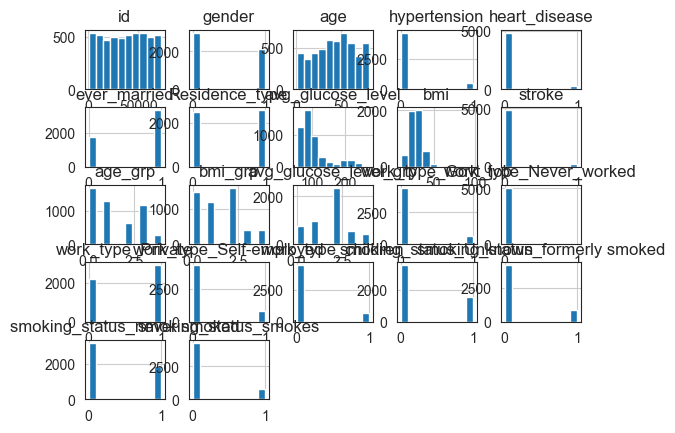

In [251]:
df.hist()

Model

In [252]:
X = df.drop('stroke', axis = 1)
Y = df['stroke']

In [254]:
X_train, X_test,Y_train, Y_test =  train_test_split(X, Y, test_size=0.3, random_state=42)

In [255]:
X_train.shape

(3577, 21)

In [256]:
Y_train.shape

(3577,)

Normalization (Z-score)

Reshaping the data is necessary in this context because the StandardScaler in scikit-learn expects input data to be in a specific format, specifically a 2D array or matrix, where each row represents a sample (data point) and each column represents a feature. This format is typical for most machine learning libraries, including scikit-learn.

In [260]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)

In [264]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

Certainly! Below, I'll provide you with a list of common hyperparameters to consider in the parameter grid for various machine learning models. Please note that the specific hyperparameters and their possible values can vary depending on the machine learning library you're using (e.g., scikit-learn, XGBoost, LightGBM, etc.) and the version of the library. Always refer to the library's documentation for the most up-to-date information.

**Random Forest**:
- `n_estimators`: Number of decision trees.
- `max_depth`: Maximum depth of the trees.
- `min_samples_split`: Minimum samples required to split an internal node.
- `min_samples_leaf`: Minimum samples required to be at a leaf node.
- `max_features`: Number of features to consider when looking for the best split.
- `bootstrap`: Whether or not bootstrap samples are used.

**Support Vector Machine (SVM)**:
- `C`: Regularization parameter.
- `kernel`: Kernel type (e.g., linear, polynomial, radial basis function).
- `gamma`: Kernel coefficient (for 'rbf' and 'poly' kernels).
- `degree`: Degree of the polynomial kernel function (for 'poly' kernel).

**Logistic Regression**:
- `penalty`: Regularization type (e.g., 'l1', 'l2', 'none').
- `C`: Inverse of regularization strength.
- `solver`: Algorithm used for optimization.
- `max_iter`: Maximum number of iterations.

**Gradient Boosting (e.g., XGBoost, LightGBM)**:
- `n_estimators`: Number of boosting rounds.
- `learning_rate`: Step size shrinkage for updates.
- `max_depth`: Maximum depth of trees.
- `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child.
- `subsample`: Fraction of samples used for fitting the trees.
- `colsample_bytree` (XGBoost) or `colsample_bytree` (LightGBM): Fraction of features used for fitting the trees.

These are just some of the common hyperparameters for these models. Depending on your specific use case and the machine learning library you're using, there may be additional hyperparameters to consider. You should refer to the documentation of the specific library and model for a comprehensive list of hyperparameters and their descriptions.

Logistic Regression

In [ ]:
LR = LogisticRegression(class_weight= 'balanced')
#Grid Search cv is which can be initialized by the dictionary.  
parameter_grid={
'C': [0.01, 0.1, 1.0, 10, 100], #learning Rate 
'penalty': ['none', 'l1', 'l2', 'elasticnet'],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(estimator=LR, param_grid= parameter_grid, cv=5) #5 fold cross validation 
grid_search.fit(X_train,Y_train)
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

In [266]:
LR = LogisticRegression(C=0.1, penalty='l2', solver='sag')
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)
Y_pred

b:\Stroke Prediction\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [267]:
LR_accuracy = accuracy_score(Y_test,Y_pred)
LR_accuracy 

0.9419439008480104

In [268]:
LR_accuracy_train = LR.score(X_train,Y_train)
LR_accuracy_train 

0.9552697791445345

In [269]:
LR_accuracy_test = LR.score(X_test,Y_test)
LR_accuracy_test

0.9419439008480104

Random Forest 

In [270]:
rfc = RandomForestClassifier(class_weight='balanced')
param_grid={
'n_estimators': [100, 200],
'max_depth': [None, 5, 10],
'max_features': ['sqrt', 'log2', None],
'random_state': [0, 42]
}
#perform grid search with cross-validation to obtain the best hyperparameters
grid_search_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_search_rfc.fit(X_train, Y_train)
#print the best hyperparameters
print(grid_search_rfc.best_estimator_)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

RandomForestClassifier(class_weight='balanced', random_state=42)
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}
0.9555490877837247


In [271]:
rfc = RandomForestClassifier(max_depth = None, max_features = 'sqrt', n_estimators = 100, random_state = 42)
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
Y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [272]:
rfc_accuracy = accuracy_score(Y_test,Y_pred_rfc)
rfc_accuracy 

0.9419439008480104

In [273]:
rfc_accuracy_test = rfc.score(X_test,Y_test)
rfc_accuracy_test

0.9419439008480104

In [274]:
rfc_accuracy_train = rfc.score(X_train,Y_train)
rfc_accuracy_train

1.0

In [ ]:
"""filename = "svm_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(best_clf,file)
input_landmarks = [[9.4, 10.44, 31.04]] 
predictions = best_clf.predict(input_landmarks)
print("Predicted Class:", predictions[0])"""

Certainly! Here's a list of common machine learning models and the types of tasks or applications they can be used for:

1. **Linear Regression**:
   - Predicting numerical values (e.g., house prices, stock prices).
   - Modeling the relationship between variables.

2. **Logistic Regression**:
   - Binary classification tasks (e.g., spam detection, disease diagnosis).
   - Multiclass classification (e.g., sentiment analysis, image classification).

3. **Decision Trees**:
   - Classification and regression tasks.
   - Feature selection and importance.

4. **Random Forest**:
   - Classification and regression.
   - Feature selection, anomaly detection.
   - Ensembling for improved performance.

5. **Support Vector Machine (SVM)**:
   - Classification (binary and multiclass).
   - Regression tasks.
   - Anomaly detection.

6. **K-Nearest Neighbors (KNN)**:
   - Classification and regression.
   - Pattern recognition.

7. **Naive Bayes**:
   - Text classification (spam detection, sentiment analysis).
   - Document classification.
   - Recommendation systems.

8. **Neural Networks (Deep Learning)**:
   - Image and speech recognition.
   - Natural language processing (NLP).
   - Autonomous vehicles.
   - Time series forecasting.

9. **K-Means Clustering**:
   - Clustering and segmentation of data.
   - Customer segmentation.
   - Anomaly detection.

10. **Principal Component Analysis (PCA)**:
    - Dimensionality reduction.
    - Data visualization.

11. **Gradient Boosting (e.g., XGBoost, LightGBM)**:
    - Classification and regression.
    - Ranking problems.
    - Anomaly detection.
    - Feature importance analysis.

12. **Recurrent Neural Networks (RNN)**:
    - Time series forecasting.
    - Natural language processing (text generation, machine translation).
    - Speech recognition.

13. **Long Short-Term Memory (LSTM)**:
    - Time series analysis.
    - Sequential data processing.
    - Speech and handwriting recognition.

14. **Convolutional Neural Networks (CNN)**:
    - Image and video analysis.
    - Object detection.
    - Medical image analysis.
    - Self-driving cars.

15. **Gaussian Mixture Models (GMM)**:
    - Clustering and density estimation.
    - Anomaly detection.
    - Speaker recognition.

16. **Reinforcement Learning (e.g., Q-Learning, Deep Q-Networks)**:
    - Game playing (e.g., chess, Go).
    - Robotics and control systems.
    - Autonomous agents.

17. **Ensemble Methods**:
    - Combining multiple models for improved performance.
    - Bagging, boosting, and stacking.

18. **Time Series Models (e.g., ARIMA, Prophet)**:
    - Time series forecasting.
    - Stock market prediction.
    - Demand forecasting.

19. **Factorization Machines**:
    - Recommender systems.
    - Click-through rate prediction.

20. **Autoencoders**:
    - Dimensionality reduction.
    - Anomaly detection.
    - Image denoising.

These are just some of the machine learning models and their typical applications. Depending on the specific machine learning library and use case, there may be variations and extensions of these models. The choice of model depends on the nature of the data and the problem you are trying to solve.